<a href="https://colab.research.google.com/github/SRARNAB7/HDS_5230_07_Arnab/blob/main/Week%2012/Week_12_Extra_Credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN DEEP LEARNING

This program builds and trains a Convolutional Neural Network (CNN) using the CIFAR-10 dataset, which contains 60,000 color images across 10 classes such as airplanes, cars, and animals. The images are normalized by dividing pixel values by 255 to improve training performance. The model consists of three convolutional layers with ReLU activation to extract features from the images, followed by max pooling layers to reduce the spatial size and prevent overfitting. After the feature extraction layers, the output is flattened and passed through a fully connected dense layer and finally a softmax layer to classify the image into one of the 10 categories.

The model is compiled using the Adam optimizer and sparse categorical cross-entropy loss function, which are suitable for multi-class classification problems. It is trained for 10 epochs using the training data, and its performance is validated on the test data at each epoch. After training, the model is evaluated on the test set, and the final accuracy is printed. A plot of training and validation accuracy across epochs is also generated to help assess the model's learning progress and detect overfitting or underfitting.

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 51ms/step - accuracy: 0.3376 - loss: 1.7832 - val_accuracy: 0.5489 - val_loss: 1.2474
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 50ms/step - accuracy: 0.5731 - loss: 1.1951 - val_accuracy: 0.6034 - val_loss: 1.1000
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 50ms/step - accuracy: 0.6409 - loss: 1.0288 - val_accuracy: 0.6387 - val_loss: 1.0377
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 50ms/step - accuracy: 0.6749 - loss: 0.9233 - val_accuracy: 0.6613 - val_loss: 0.9576
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 50ms/step - accuracy: 0.7011 - loss: 0.8425 - val_accuracy: 0.6768 - val_loss: 0.9167
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 50ms/step - accuracy: 0.7279 - loss: 0.7809 - val_accuracy: 0.6938 - val_loss: 0.8822
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 52ms/step - accuracy: 0.7431 - loss: 0.7222 - val_accuracy: 0.6763 - val_loss: 0.9391
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 50ms/step - accuracy: 0.7608 -

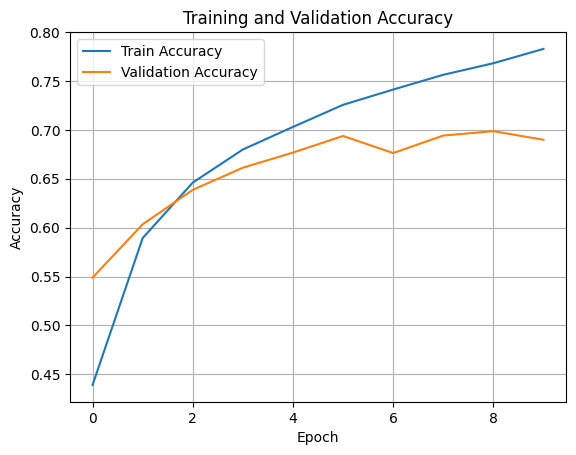

In [ ]:
# Importing required libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Loading and normalizing CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Defining class names for later visualization
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Building the CNN model
#This CNN model processes 32x32 color images through three convolutional layers with ReLU activation to extract features,
#each followed by max pooling to reduce spatial size. The output is flattened and passed through a dense layer with 64 units,
#ending in a softmax layer to classify images into 10 categories.
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training the model
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

# Evaluating the model based on the test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

# Plotting accuracy history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


The Convolutional Neural Network (CNN) trained on the CIFAR-10 dataset demonstrated steady learning over the course of 10 epochs. Initially, the model achieved low training and validation accuracy, with values of 33.7% and 54.8% respectively in the first epoch. However, as training progressed, the model improved significantly. By epoch 6, validation accuracy peaked at approximately 69.3%, while training accuracy reached 72.8%, indicating that the model was learning meaningful patterns and generalizing well to unseen data. From epochs 7 to 10, although training accuracy continued to improve and eventually reached 78.8%, validation accuracy began to plateau and slightly decline, falling to 68.9% in the final epoch. This widening gap between training and validation performance is a clear sign of overfitting—where the model begins to memorize the training data rather than learning general features that transfer to new examples. The final test accuracy of 68.99% confirms that the model performs reasonably well on unseen data, though with room for improvement. To enhance generalization and reduce overfitting, strategies such as dropout, data augmentation, or early stopping could be applied. Overall, the CNN effectively learned from the CIFAR-10 dataset but would benefit from regularization techniques for more robust performance.